<a href="https://colab.research.google.com/github/surajsingh1204/Supervised-learing-/blob/main/Mini_project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supervised Learning Regression Problem
 # Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique
 # problem-solving methods ensure maximum scores with minimum effort.
 # They recently launched a feature where students/learners can come to their website and check their probability of
 # getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian
 # perspective.
 # Following are the attributes of the dataset.
 # 1. Serial No. : Unique ID of record/student
 # 2. GRE Score : GRE (Graduate Record Examination) score (0-340) of student
 # 3. TOEFL Score : TOEFL (Test of English as a Foreign Language) score (0-120) of student
 # 4. University Rating : Rating of the university to which student is applying on a scale of 1-5
 # 5. SOP : Strength of the student’s Statement of Purpose on a scale of 1-5
 # 6. LOR : Strength of the student’s Letters of Recommendation on a scale of 1-5
 # 7. CGPA : Student’s Cumulative Grade Point Average (CGPA) on a scale of 0-10
 # 8. Research : Indicates whether the student has research experience (either 1 or 0)
 # 9. Chance of Admit : Probability of the student being admitted to the graduate program (either 1 or 0)
 # Defining Problem Statement and Analyzing Basic Metrics
  # Problem Statement : The goal is to identify the factors influencing graduate admissions and predict the chances
 # of admission based on these factors. This will help Jamboree understand which elements are essential in graduate
 # admissions from an Indian context and refine their admissions probability tool.
 # Objectives:
 # 1. Perform exploratory data analysis (EDA) to gain insights into the dataset.
 # 2. Build and evaluate a Linear Regression model to predict admission chances.
 # 3. Provide actionable insights and recommendations

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("jamboree_admission.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
#checking how many rows and columns are there in dataframe
df.shape

(500, 9)

In [7]:
#Checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
#Statistical Summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
#check for null values
df.isnull().sum()


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [10]:
#Check number of values in serial No. column
df["Serial No."].nunique()

500

In [11]:
#checking the number of unique GRE scores
df["GRE Score"].value_counts()

,count
GRE Score,
312,24
324,23
316,18
321,17
322,17
327,17
311,16
320,16
314,16


In [12]:
#Checking the number of unique TOEFL Score values
df["TOEFL Score"].value_counts()

,count
TOEFL Score,
110,44
105,37
104,29
107,28
106,28
112,28
103,25
100,24
102,24


In [13]:
#check the number of unique University Rating values
df["University Rating"].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [14]:
 # Check the unique SOP values
 df["SOP"].value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


In [15]:
# Check the unique LOR values
df["LOR "].value_counts()

,count
LOR,
3.0,99
4.0,94
3.5,86
4.5,63
2.5,50
5.0,50
2.0,46
1.5,11
1.0,1


In [16]:
# Check the number of unique CGPA values
df["CGPA"].value_counts()

,count
CGPA,
8.76,9
8.00,9
8.12,7
8.45,7
8.54,7
...,...
9.92,1
9.35,1
8.71,1


In [17]:
 # Check the number of student who have Reasearch experience and those who don't
df["Research"].value_counts()

,count
Research,
1,280
0,220


In [18]:
 # COMMENT ON THE RANGE OF ATTRIBUTES
 # 1. There are 500 rows and 9 columns
 # 2. Column names are: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit
 # 3. Serial No., GRE Score, TOEFL Score, University Rating and Research are of integer data type.
 # 4. SOP, LOR, Age, CGPA and Chance of Admit are of float data type.
 # 5. GRE Score, TOEFL Score, CGPA, Chance of Admit are of numeric data type and University Rating, SOP, LOR and research are of category data type.
 # 6. Serial No. column acts as an index as it uniquely identifies each record.
 # 7. There are 500 Student records in the Jamboree Dataset.
 # 8. There are no null values present in the dataset.
 # 9. Statistics of the Chance of Admit column:
 #       - Mean               :   0.72174
 #       - Standard deviation :   0.14114
 #       - Minimum value      :   0.34000
 #       - Maximum value      :   0.97000
 # 10. Following are the categorical attributes of the dataset.
#       b. GRE Score : GRE score contains values from 0 to 340
 #       c. TOEFL Score : TOEFL score has values from 0 to 120
 #       d. University Rating : Rating of the university on a scale of 1-5
 #       e. SOP : Strength of the student’s Statement of Purpose on a scale of 1-5
 #       f. LOR : Strength of the student’s Letters of Recommendation on a scale of 1-5
 #       h. Research : Indicates whether the student has research experience either 1 (student has research experience) or 0 (student doesnot have
 #          research experience)
 # 11. Chance of Admit column is the target feature.
 # VISUAL ANALYSIS : UNIVARIATE AND BIVARIATE
 # FOR CONTINUOS VARIABLES : DISTPLOT,COUNTPLOT,HISTOGRAM FOR UNIVARIATE ANALYSIS

<Axes: xlabel='GRE Score', ylabel='Count'>

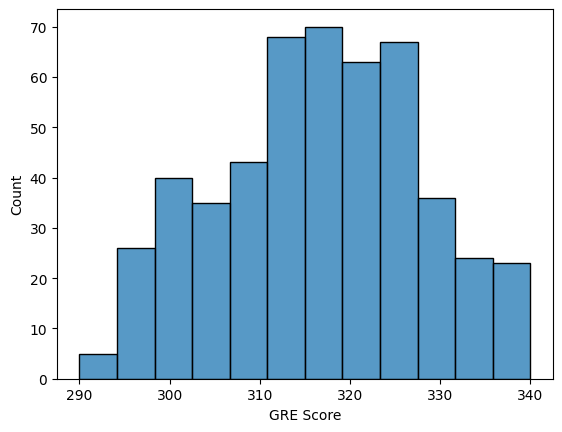

In [19]:
# checking the distribution of GRE Score
import seaborn as sns
sns.histplot(df["GRE Score"])
#<Axes:xlabel='GRE Score', ylabel='Count'>

<Axes: xlabel='TOEFL Score', ylabel='Count'>

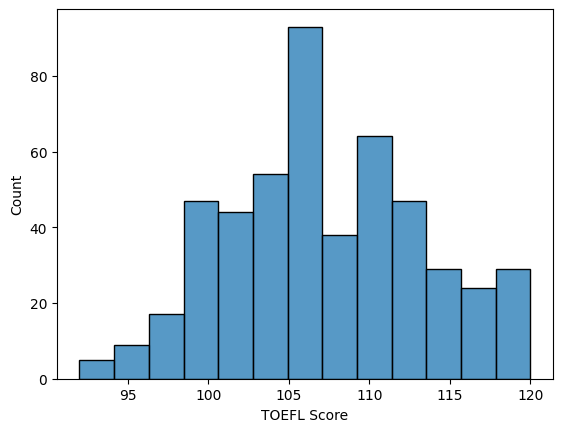

In [20]:
sns.histplot(df["TOEFL Score"])

<Axes: xlabel='University Rating', ylabel='Count'>

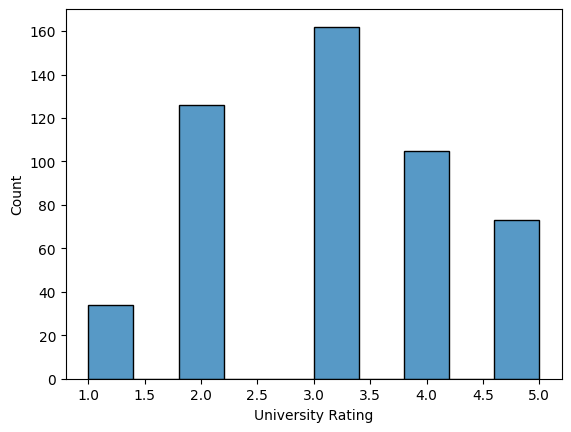

In [21]:
sns.histplot(df["University Rating"])

<Axes: xlabel='SOP', ylabel='Count'>

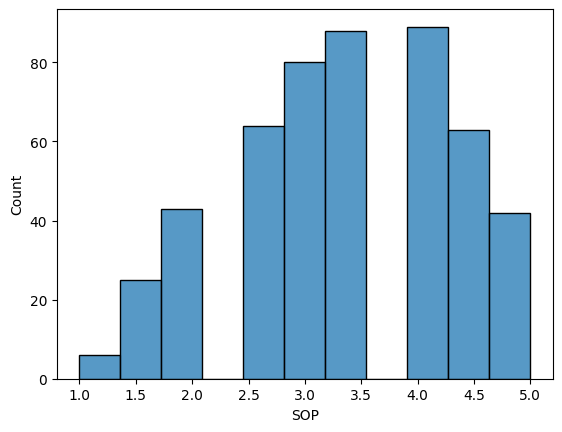

In [22]:
sns.histplot(df["SOP"])

<Axes: xlabel='LOR ', ylabel='Count'>

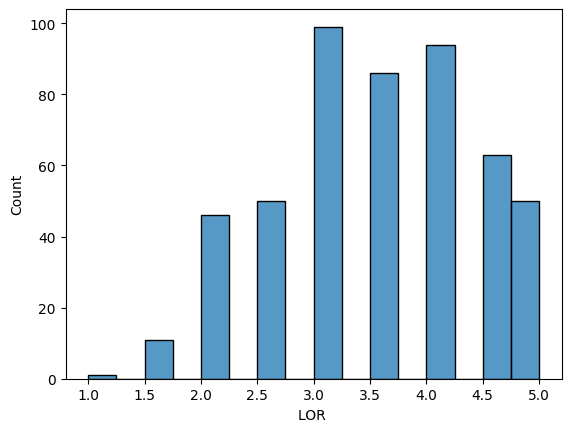

In [23]:
sns.histplot(df["LOR "])

<Axes: xlabel='CGPA', ylabel='Count'>

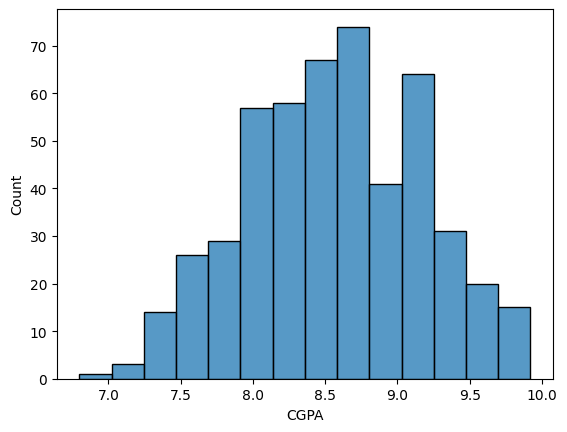

In [24]:
sns.histplot(df["CGPA"] )

<Axes: xlabel='University Rating', ylabel='count'>

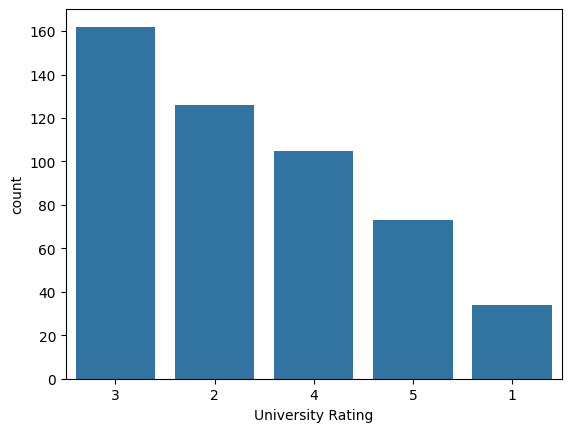

In [25]:
# Checking the count of University Rating
sns.countplot(data=df, x="University Rating" , order=df["University Rating"].value_counts().index)


<Axes: xlabel='SOP', ylabel='count'>

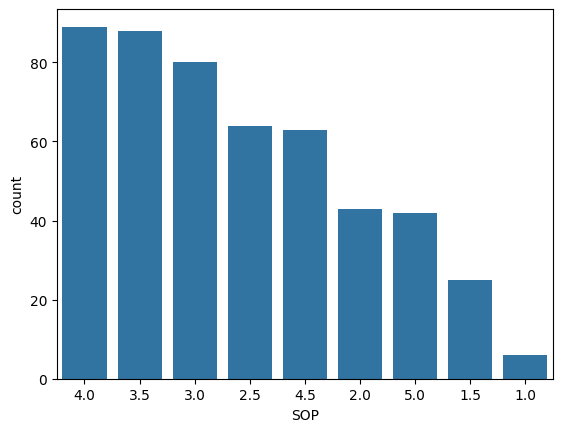

In [26]:
# Checking the count of SOP
sns.countplot(data=df, x="SOP" , order=df["SOP"].value_counts().index)

<Axes: xlabel='LOR ', ylabel='count'>

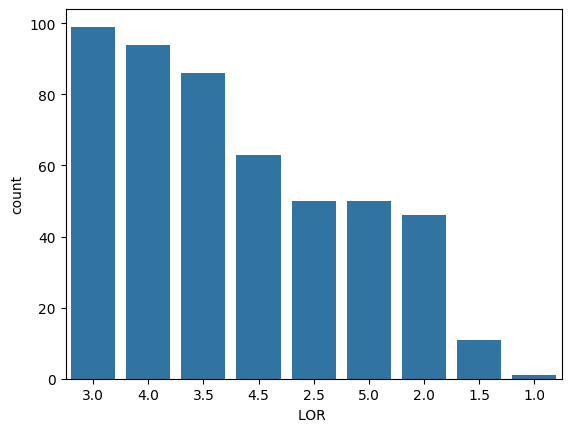

In [27]:
sns.countplot(data=df, x="LOR " , order=df["LOR "].value_counts().index)

<Axes: xlabel='Research', ylabel='count'>

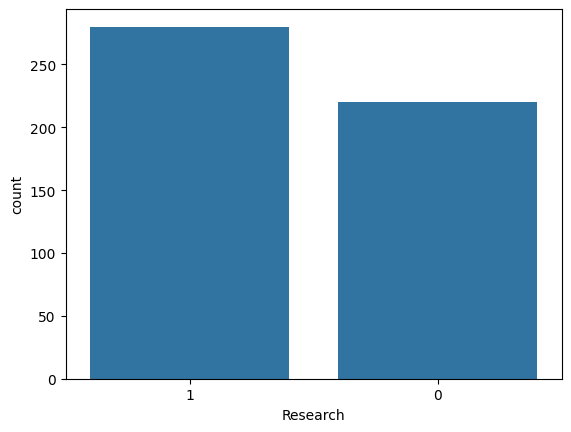

In [28]:
sns.countplot(data=df, x="Research" , order=df["Research"].value_counts().index)

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

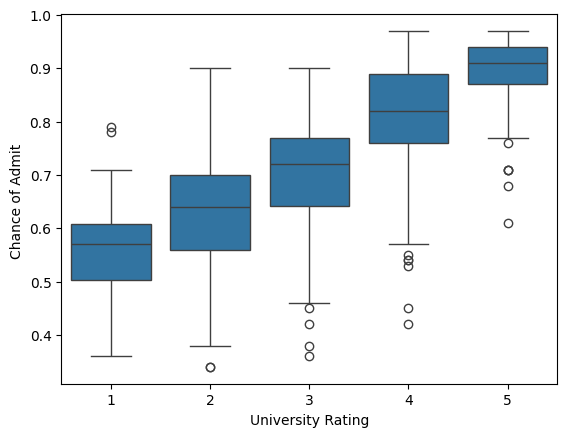

In [29]:
# Which University Rating group has more chance of admit.
sns.boxplot(data=df,x="University Rating", y="Chance of Admit ")

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

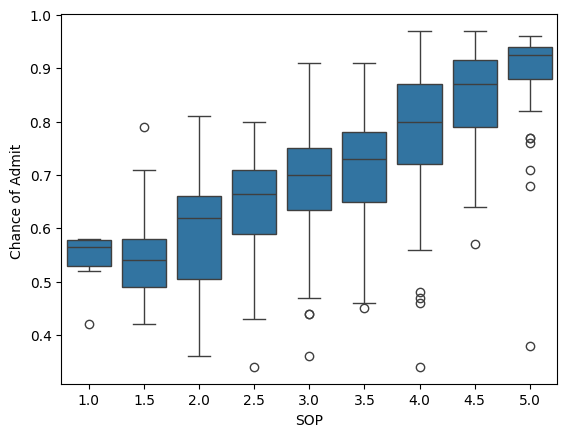

In [30]:
sns.boxplot(data=df,x="SOP", y="Chance of Admit ")

<Axes: xlabel='Research', ylabel='Chance of Admit '>

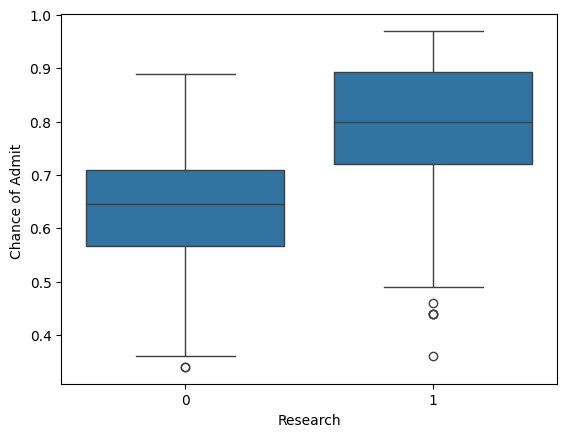

In [31]:
sns.boxplot(data=df,x="Research", y="Chance of Admit ")

<Axes: xlabel='LOR ', ylabel='Chance of Admit '>

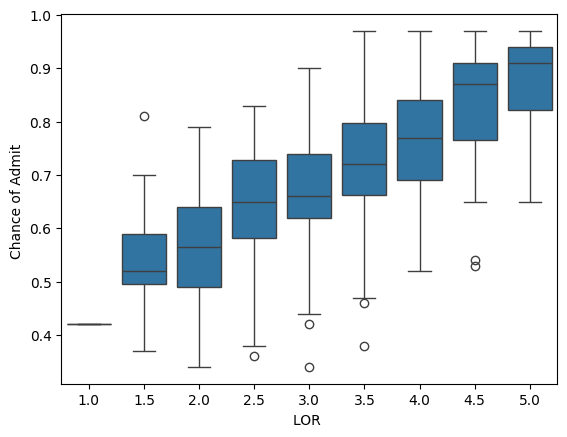

In [32]:
sns.boxplot(data=df,x="LOR ", y="Chance of Admit ")

In [33]:
pd.crosstab(df["Chance of Admit "],df["University Rating"])

University Rating,1,2,3,4,5
Chance of Admit,,,,,
0.34,0,2,0,0,0
0.36,1,0,1,0,0
0.37,1,0,0,0,0
0.38,0,1,1,0,0
0.39,0,1,0,0,0
...,...,...,...,...,...
0.93,0,0,0,5,7
0.94,0,0,0,2,11
0.95,0,0,0,3,2


In [49]:
df.loc[df["Chance of Admit "].between(0,0.5,"both"),"chance-group"] = "0.0-0.5"
df.loc[df["Chance of Admit "].between(0.5,0.65,"both"),"chance-group"] = "0.51-0.65"
df.loc[df["Chance of Admit "].between(0.66,0.8,"both"),"chance-group"] = "0.66-0.8"
df.loc[df["Chance of Admit "].between(0.81,1.0,"both"),"chance-group"] = "0.81-1.0"

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

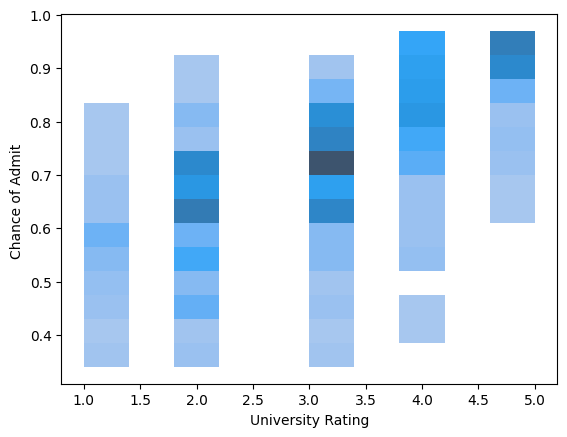

In [50]:
sns.histplot(x = df["University Rating"], y = df["Chance of Admit "])

In [51]:
#Contigency table for chance group pertaining to LOR
pd.crosstab(df["chance-group"] ,df["LOR "])

LOR,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
chance-group,,,,,,,,,
0.0-0.5,1,3,13,7,9,4,0,0,0
0.51-0.65,0,6,24,19,37,17,14,3,1
0.66-0.8,0,1,9,21,44,46,48,22,9
0.81-1.0,0,1,0,3,9,19,32,38,40


<Axes: xlabel='LOR ', ylabel='chance-group'>

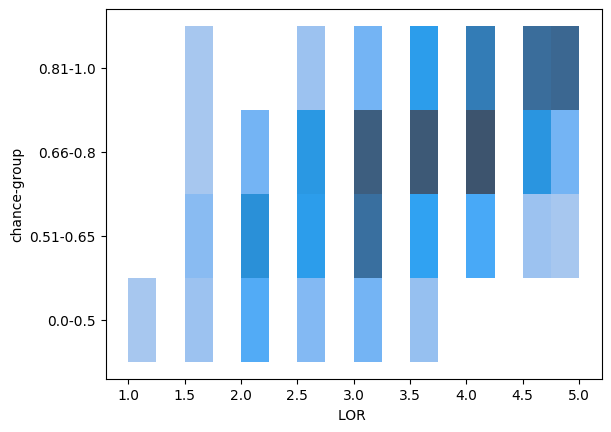

In [52]:
sns.histplot(x = df["LOR "], y = df["chance-group"])

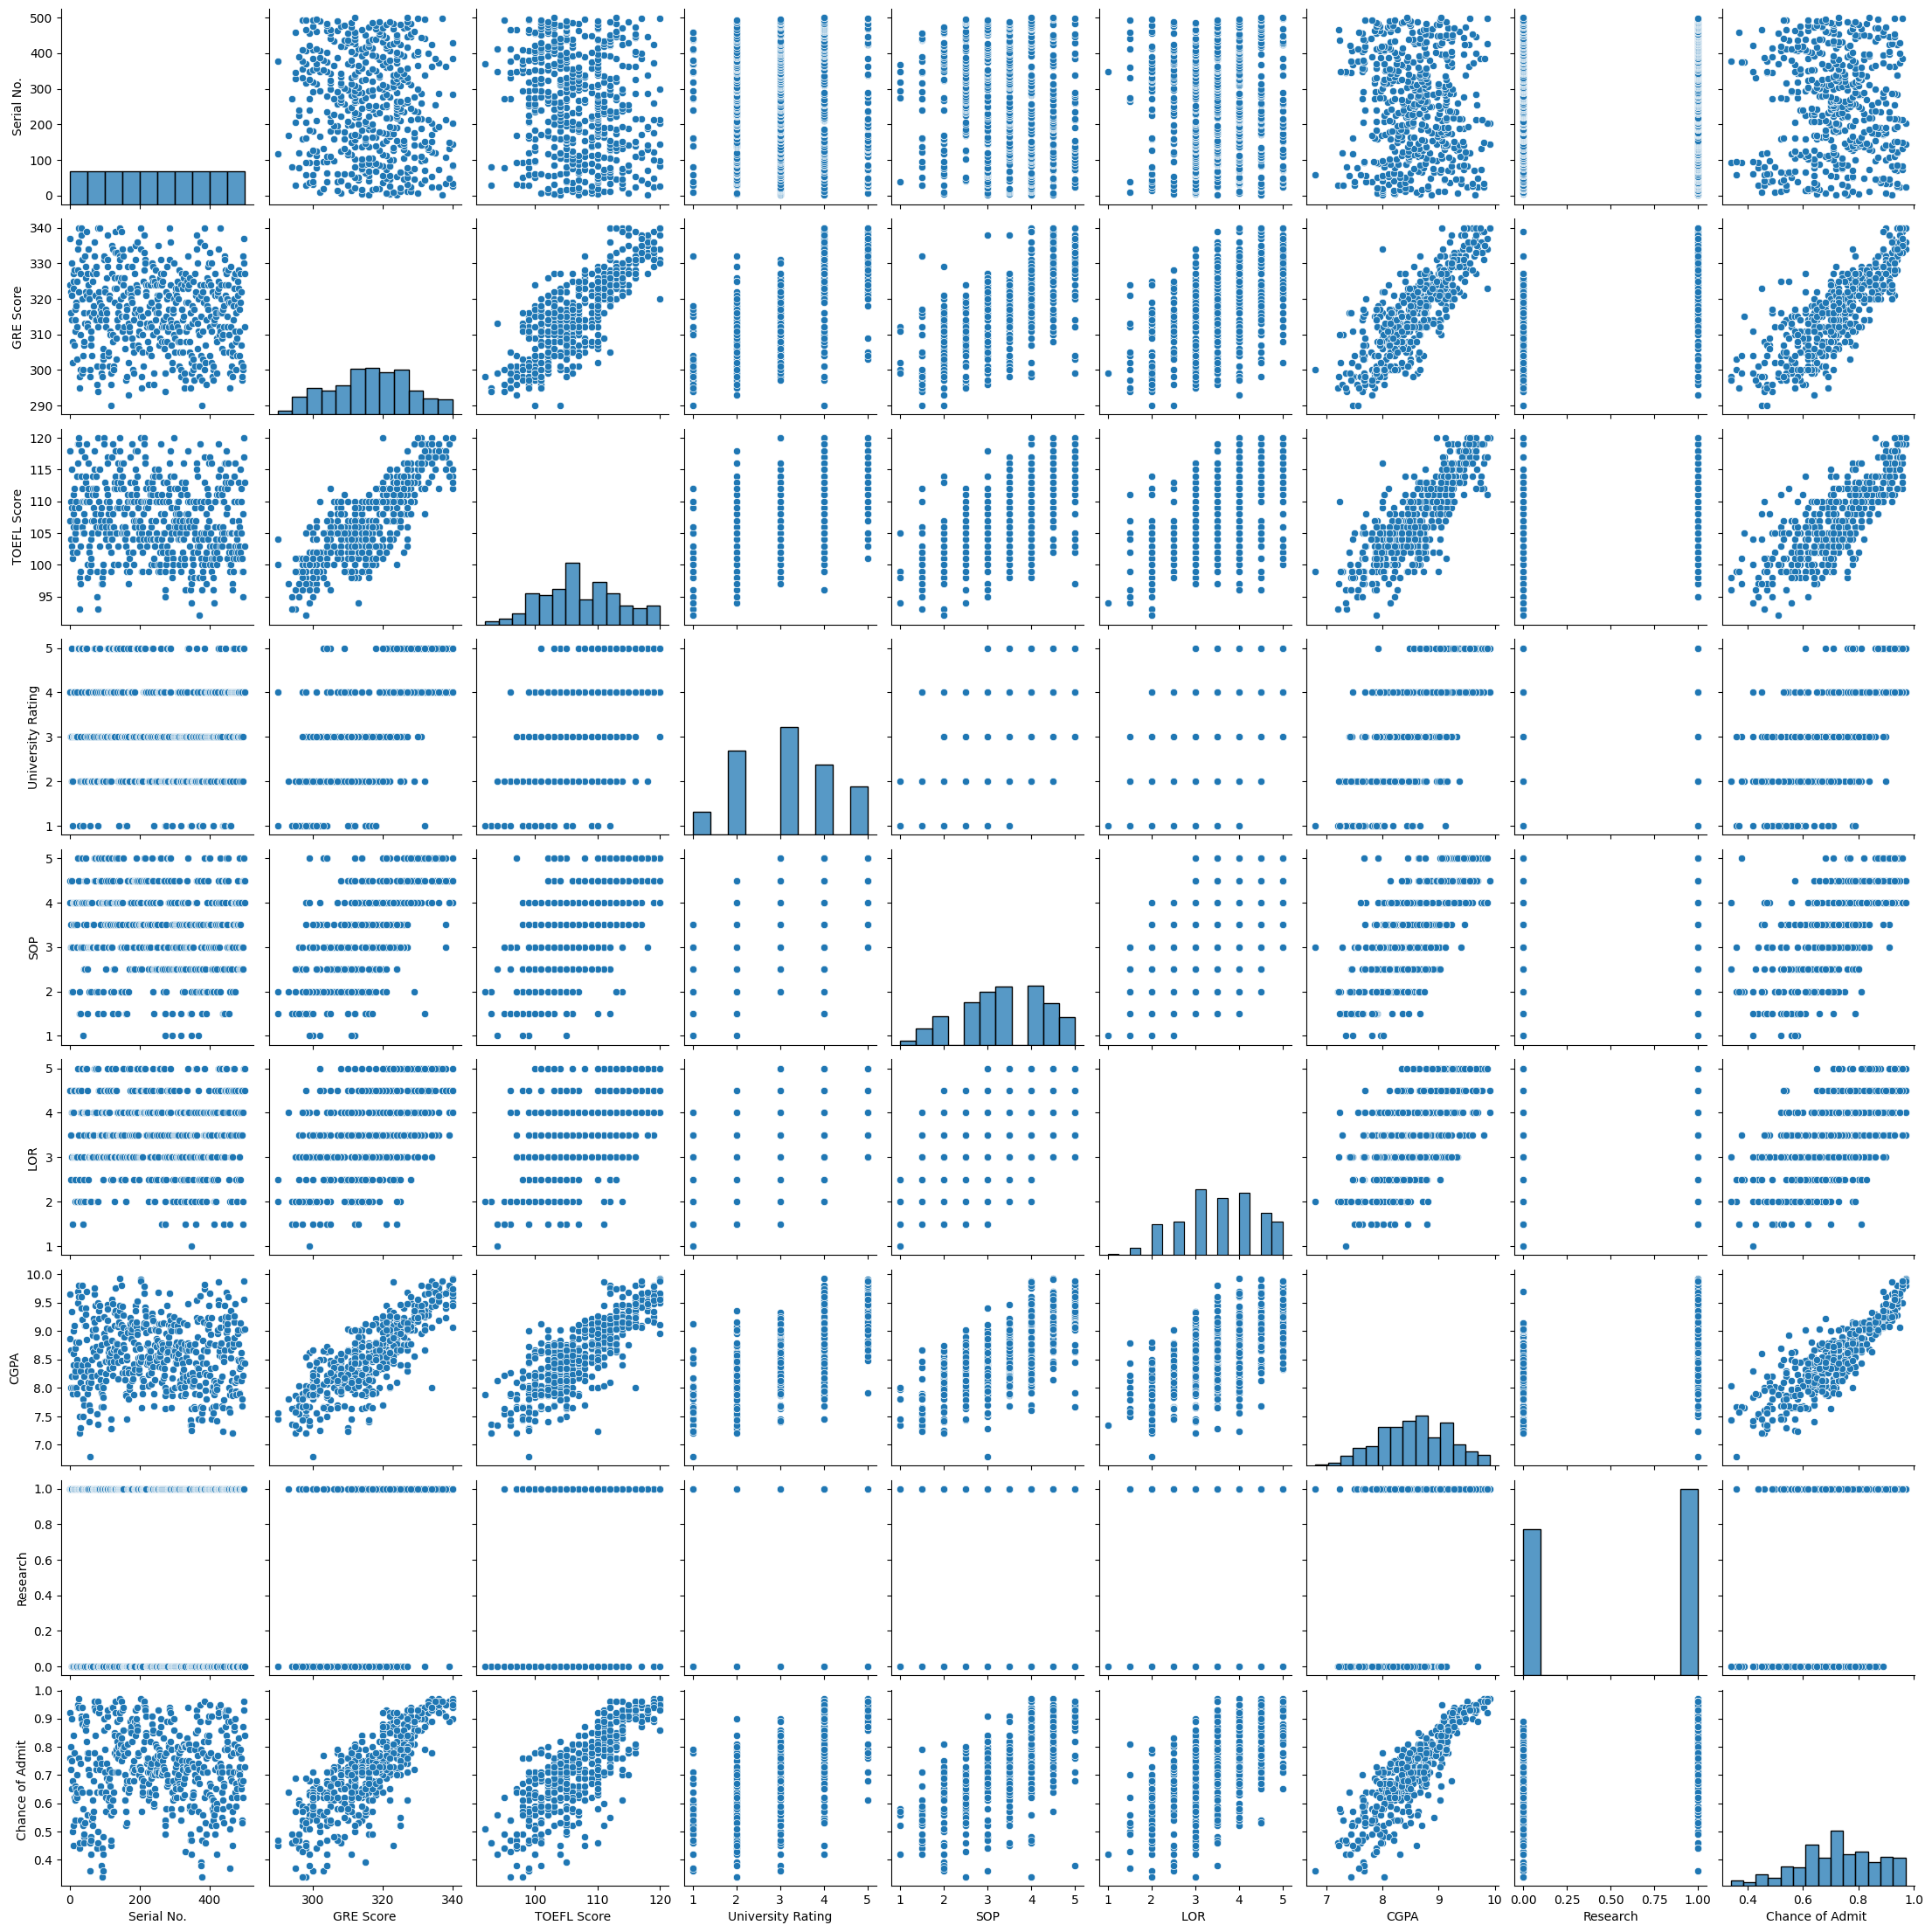

In [53]:
 # Contigency table between purchase group specific to a particular marital status
pd.crosstab(df["chance-group"],df["CGPA"])
 {"type":"dataframe"}

 # CO-RELATION : HEATMAPS AND PAIRPLOTS
 #Checking the co relation between each andevery variable using pair polt
 sns.pairplot(df)

In [ ]:
# Research column don't have a very big impact on chance of admit, by seeing the marginal score we can drop it. after inferencing.
 # Columns like gre score total score in cgpa as a linear regression line that is very much concentrating if gre or toefl or CPA is high then
 # chance of getting placed is also high so it forms a linear regression there columns like university ranking and SOP LOR
 # Are also tend to be in linear manner but they are in a very big wide of freeze it is because of their outliers we can check that and then
 # we can treat their outliers

In [57]:
# Convert the 'CGPA' column to numeric, handling the range values
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        if '-' in value:
            lower, upper = map(float, value.split('-'))
            return (lower + upper) / 2
        else:
            return float('nan')  # Handle invalid values as NaN
# Apply the function to the 'CGPA' column
df['chance-group'] = df['chance-group'].apply(convert_to_numeric) # fixed the indentation here
# Now calculate the correlation
df1 = df.corr()
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance-group
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505,0.050632
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.723526
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.712313
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.612044
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.602361
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.594709
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.803887
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.489977
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.932924
chance-group,0.050632,0.723526,0.712313,0.612044,0.602361,0.594709,0.803887,0.489977,0.932924,1.000000


<Axes: >

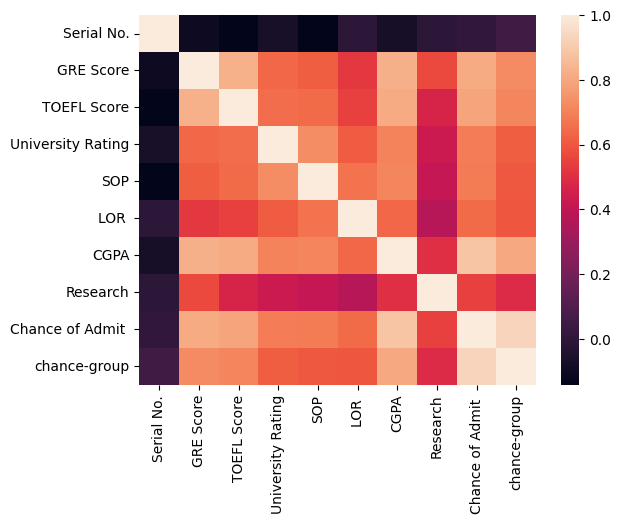

In [58]:
# Heatmap for depicting co -relation amongst variables : darker block (black ) means that attributes are least co -related
sns.heatmap(data = df1)

In [59]:
#missing values and outlier detection'
# checking whether there are any missing values present or not
df.isna().sum(axis = 0)

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0
chance-group,0


In [60]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance-group
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.707880
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.175398
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.250000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.580000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,0.730000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,0.905000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,0.905000


<Axes: xlabel='Chance of Admit '>

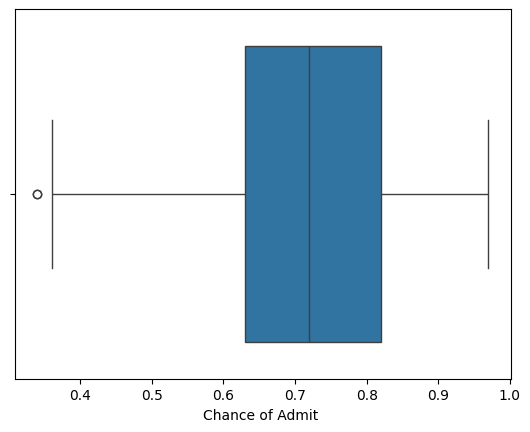

In [61]:
 # We can see the mean value of chance of admit is quite less than maximum value and too large than than the minimum value. It has outliers.
 # Lets check it through boxplot.
 # Plotting the boxplot for checking outliers: Outliers lie below the value 0.4
 sns.boxplot(data = df,x = "Chance of Admit ")

In [63]:
# Checking how many outliers are present in the column chance of admit
df.loc[df["Chance of Admit "]<0.4]["Chance of Admit "].count()

8

In [64]:
#  4.1. Does Reseach experience matter to Student's chance of admittance to University
df.groupby("Research")["Chance of Admit "].agg(["min","max","count","sum"])

,min,max,count,sum
Research,,,,
0,0.34,0.89,220,139.68
1,0.36,0.97,280,221.19


In [65]:
 # We can see that minimum amount spent by a female and male is approximately equal.
 # There is not much diffrence in maximum students admitted to universty if they have research experience or not.
 # There is a huge diffrence in count and sum of students admitted to universty if they have research experience or not.
# Lets seperate our dataframe into research experience students and no research experience students and check the mean of averages for some number
 # of diffrent sub-samples.
 df_no_experience = df[df["Research"] == 0]
 df_no_experience.reset_index()
 df_no_experience.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance-group
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.58
7,8,308,101,2,3.0,4.0,7.90,0,0.68,0.73
8,9,302,102,1,2.0,1.5,8.00,0,0.50,0.58
9,10,323,108,3,3.5,3.0,8.60,0,0.45,0.25
15,16,314,105,3,3.5,2.5,8.30,0,0.54,0.58


In [66]:
 # checking the total number of rows and columns in df_no_experience
 df_no_experience.shape

 # There are 220 rows in total and 10 columns.
 # Checking which CGPA in no research experience student tends to admitted to university more

(220, 10)

In [67]:
pd.crosstab(df["CGPA"],df["chance-group"])

chance-group,0.250,0.580,0.730,0.905
CGPA,,,,
6.80,1,0,0,0
7.20,1,0,0,0
7.21,1,0,0,0
7.23,0,1,0,0
7.25,0,1,0,0
...,...,...,...,...
9.82,0,0,0,1
9.86,0,0,0,1
9.87,0,0,0,2


In [68]:
df1 = df.drop(columns=['Serial No.'])
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance-group
0,337,118,4,4.5,4.5,9.65,1,0.92,0.905
1,324,107,4,4.0,4.5,8.87,1,0.76,0.730
2,316,104,3,3.0,3.5,8.00,1,0.72,0.730
3,322,110,3,3.5,2.5,8.67,1,0.80,0.730
4,314,103,2,2.0,3.0,8.21,0,0.65,0.580
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,0.905
496,337,117,5,5.0,5.0,9.87,1,0.96,0.905
497,330,120,5,4.5,5.0,9.56,1,0.93,0.905
498,312,103,4,4.0,5.0,8.43,0,0.73,0.730


In [69]:
for i in df1.columns:
    print(i, ": ",'\n',df1[i].unique(), '\n')

GRE Score :  
 [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293] 

TOEFL Score :  
 [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92] 

University Rating :  
 [4 3 2 5 1] 

SOP :  
 [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5] 

LOR  :  
 [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ] 

CGPA :  
 [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.0

In [72]:
df1 = df1[['University Rating', 'SOP', 'LOR ','Research','GRE Score', 'TOEFL Score','CGPA','Chance of Admit ']]
df1 = df1.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})
df1

,University Rating,SOP,LOR,Research,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,4,4.5,4.5,1,337,118,9.65,0.92
1,4,4.0,4.5,1,324,107,8.87,0.76
2,3,3.0,3.5,1,316,104,8.00,0.72
3,3,3.5,2.5,1,322,110,8.67,0.80
4,2,2.0,3.0,0,314,103,8.21,0.65
...,...,...,...,...,...,...,...,...
495,5,4.5,4.0,1,332,108,9.02,0.87
496,5,5.0,5.0,1,337,117,9.87,0.96
497,5,4.5,5.0,1,330,120,9.56,0.93
498,4,4.0,5.0,0,312,103,8.43,0.73


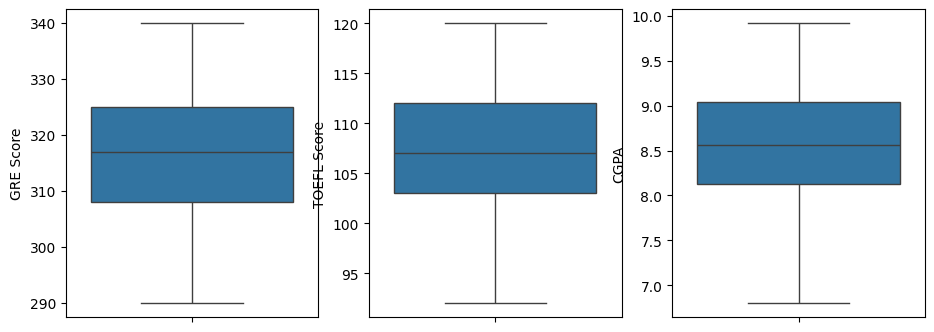

In [73]:
 # univariate analysis
 count = 1
 plt.figure(figsize=(15,4))
 for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.boxplot(y= df1[i])
    count += 1
 plt.show()

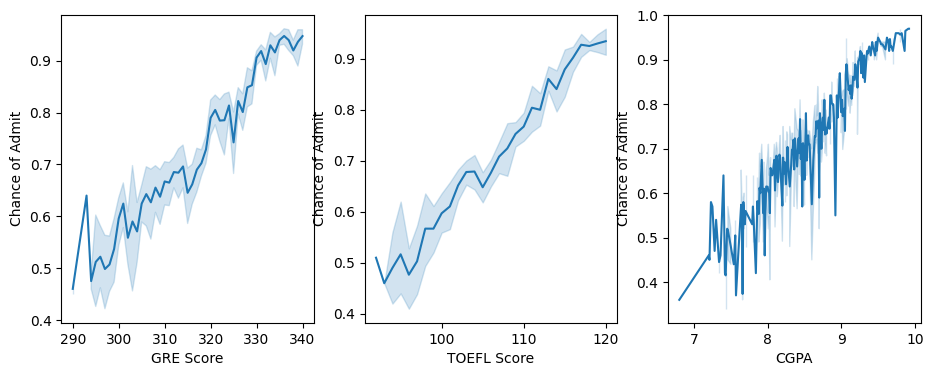

In [74]:
 # In performing univariate analysis on GRE score, TOFEL and CGPA, we find that there are no outliers which is good because we can see that all its mean
 # are concentrated towards the center and we can say that it is a normally distributed curve so we can also verify this with qq plot and these
 # 3 columns are good to go with training
 # Bivariate analysis
 count = 1
 plt.figure(figsize=(15,4))
 for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.lineplot(y =df1['Chance of Admit'], x= df1[i])
    count += 1
 plt.show()

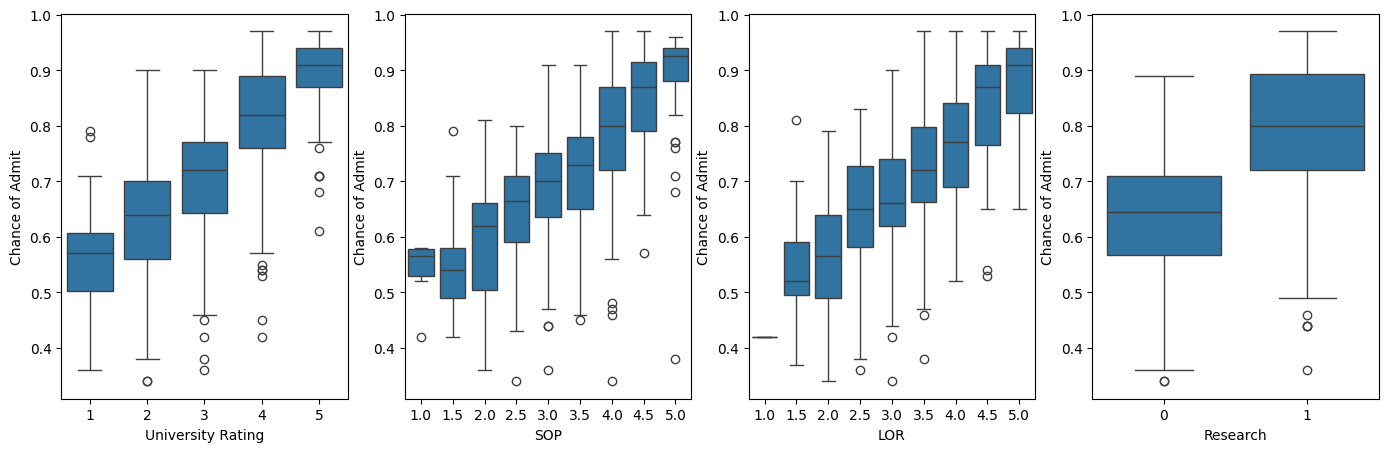

In [77]:
# so we are also having hey numeric data type so gre score toefl score and CPA so even we can see that toefl score and Diaries cover are pretty
 # much in straight line but CPA which has a huge let's say like large outliers though that has to be even treated so for numeric data type how
 # will you treat up outliers so it is difficult right so yeah but we have to I think here for CPA we can use standardization which is more
 # effective in this case
 # Multivariate analysis
count = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP', 'LOR','Research']:
    plt.subplot(1,4,count)
    sns.boxplot(y =df1['Chance of Admit'], x= df1[i])
    count += 1
plt.show()

<Axes: >

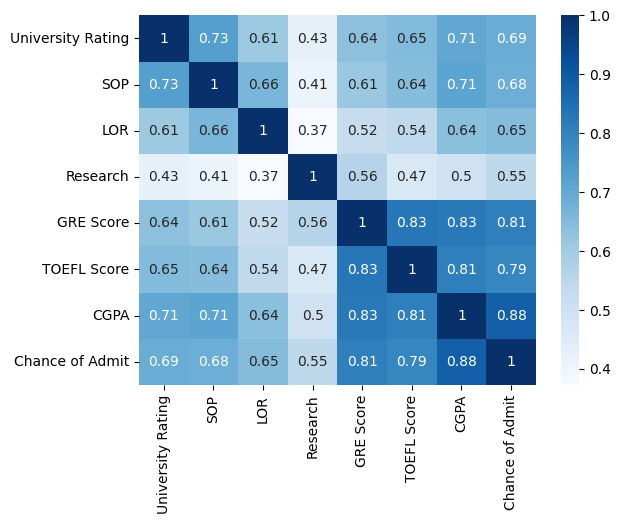

In [78]:


 # Continious variable analysis
 sns.heatmap(df1.corr(), annot=True, cmap='Blues')

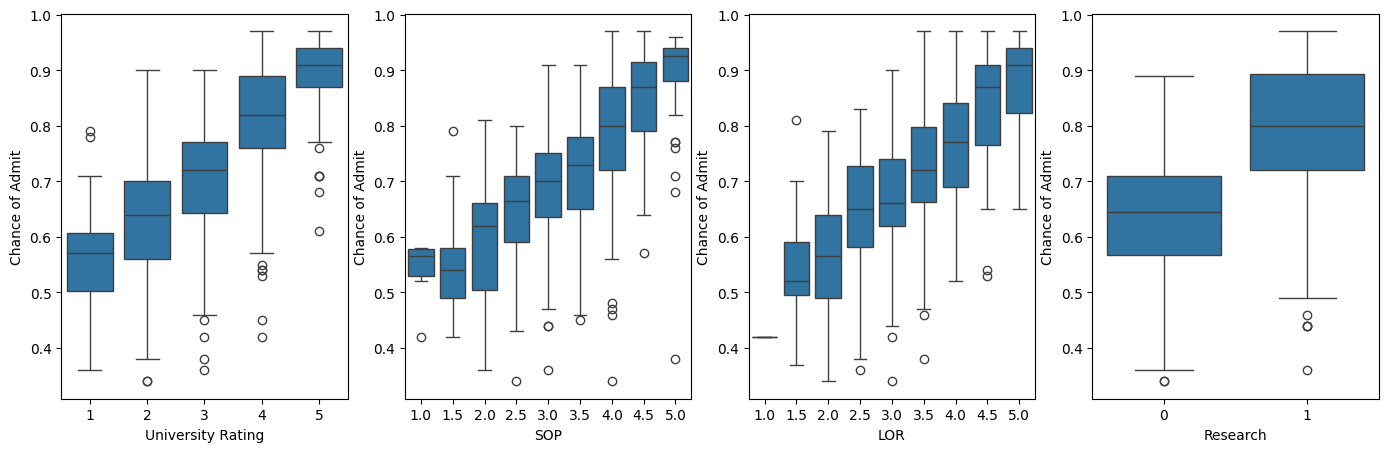

In [80]:
# Outliers Treatment:
count = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP','LOR','Research']:
    plt.subplot(1,4,count)
    sns.boxplot(y= df1['Chance of Admit'], x= df1[i])
    count += 1
plt.show()

<Axes: >

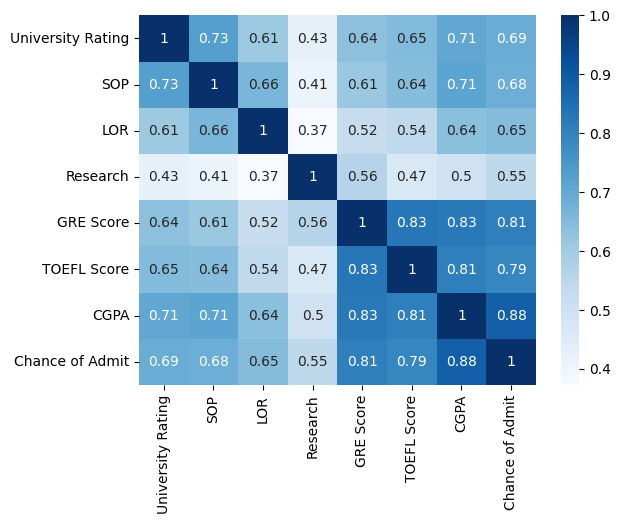

In [81]:
#Continious variable analysis
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

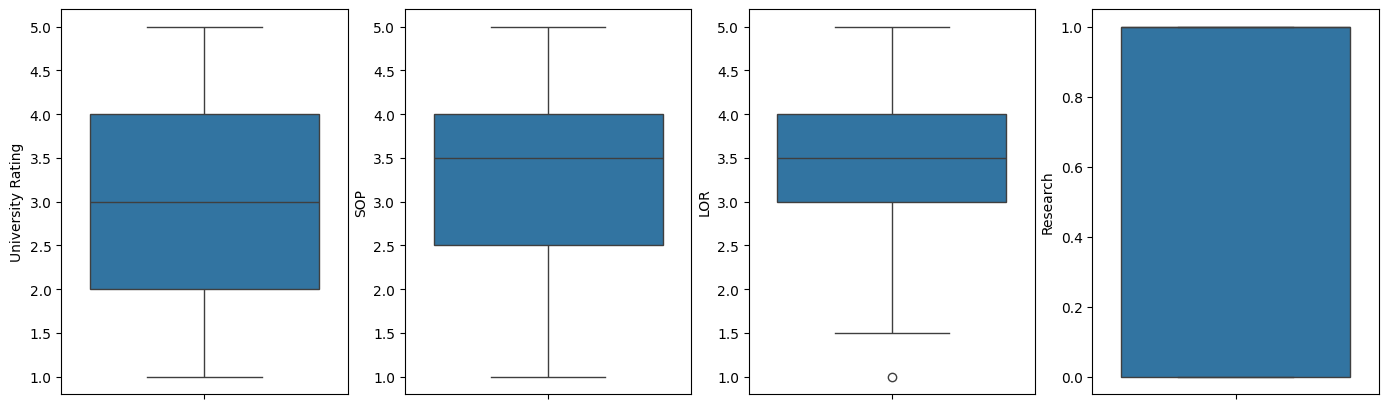

In [83]:
#outliners Treatment
count = 1
plt.figure(figsize=(17,5))
for i in ['University Rating', 'SOP','LOR','Research']:
    plt.subplot(1,4,count)
    sns.boxplot(y= df1[i])
    count += 1
plt.show()

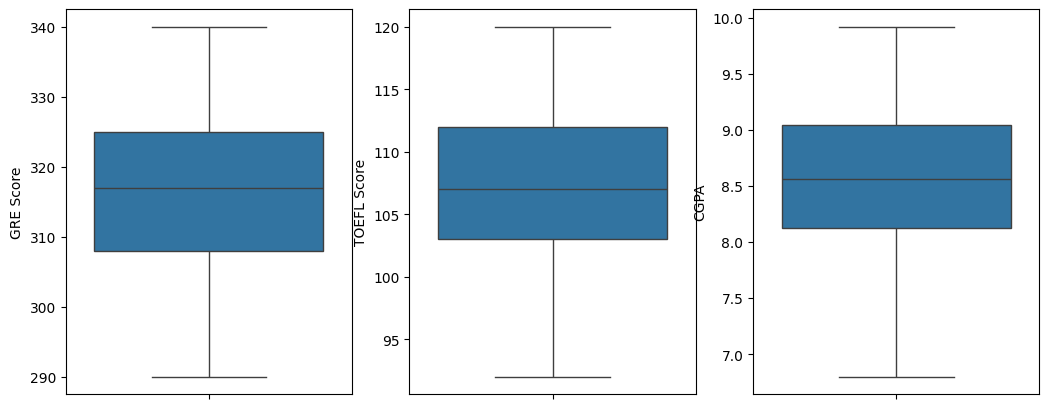

In [86]:
count = 1
plt.figure(figsize=(17,5))
for i in ['GRE Score', 'TOEFL Score','CGPA']:
    plt.subplot(1,4,count)
    sns.boxplot(y = df1[i])
    count += 1
plt.show()

In [88]:
# This data doesn,t have any outliners
# data preprocessing for modeling:
df1 ['University Rating '] = df1.groupby('University Rating')['Chance of Admit'].transform('mean')
df1 ['SOP '] = df1.groupby('SOP')['Chance of Admit'].transform('mean')
df1 ['LOR'] = df1.groupby('LOR')['Chance of Admit'].transform('mean')
df1 ['Research '] = df1.groupby('Research')['Chance of Admit'].transform('mean')

In [89]:
#Normalization the data frame
scaler = MinMaxScaler()
df_normalized =pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [91]:
# defining the feature variable 'x' by dropping Chance of Admit and target variable 'y' as the Chance of Admit column
x = df1.drop('Chance of Admit', axis=1)
y = df1['Chance of Admit']

In [93]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [94]:
# Initialize models: Linear Regression, Lasso Regression, and Ridge Regression
model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)
 # Fit each model to the training data
model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
Ridge(alpha=0.1)

Ridge(alpha=0.1)

In [96]:
# Display model coefficients, intercepts and R^2 scores
print("Linear Regression Coefficients:", model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Linear Regression Intercept:", model.intercept_)
print("Lasso Regression Intercept:", lasso_model.intercept_)
print("Ridge Regression Intercept:", ridge_model.intercept_)
print("Linear Regression R^2 Score (Train):", model.score(x_train, y_train))
print("Lasso Regression R^2 Score (Train):",
lasso_model.score(x_train, y_train))
print("Ridge Regression R^2 Score (Train):",
ridge_model.score(x_train, y_train))

Linear Regression Coefficients: [-0.05162302 -0.00398555  0.14106412  0.02753709  0.00160873  0.00374302
  0.10708771  0.72453194  0.03687395  0.00426977]
Lasso Regression Coefficients: [0.         0.         0.         0.         0.00686843 0.00487259
 0.         0.         0.         0.        ]
Ridge Regression Coefficients: [-0.00109635 -0.00740262  0.13434755  0.02763485  0.0016428   0.00380399
  0.10663923  0.13069308  0.07153448  0.00428493]
Linear Regression Intercept: -1.5994865263424551
Lasso Regression Intercept: -1.970360238019496
Ridge Regression Intercept: -1.3504345513649212
Linear Regression R^2 Score (Train): 0.8233774535715164
Lasso Regression R^2 Score (Train): 0.6947850448012634
Ridge Regression R^2 Score (Train): 0.82221852475215


In [97]:
 # Predict the target values on the test set using each model
y_pred = model.predict(x_test)
y_pred_lasso = lasso_model.predict(x_test)
y_pred_ridge = ridge_model.predict(x_test)
 # Calculate Mean Squared Error (MSE) for each model on the test set
mse = mean_squared_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
 # Display the MSE results to compare model performance, with lower MSE indicating better fit
print('MSE without regularization (Linear Regression):', mse)
print('MSE with Lasso regularization:', mse_lasso)
print('MSE with Ridge regularization:', mse_ridge)

MSE without regularization (Linear Regression): 0.004213407709126354
MSE with Lasso regularization: 0.007471275276048496
MSE with Ridge regularization: 0.004149072903166663


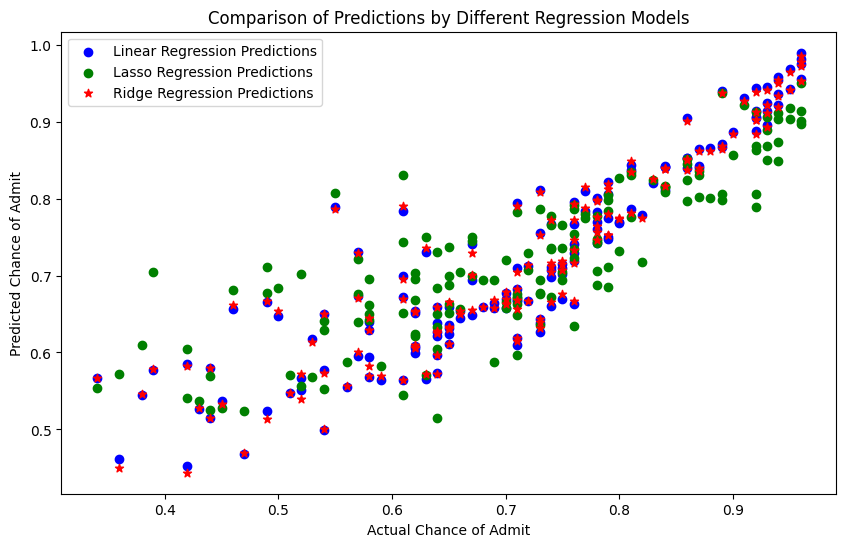

In [99]:
# Visualize the comparison of actual vs predicted values for each model
import matplotlib.pyplot as plt # Import matplotlib for plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label="Linear Regression Predictions")
plt.scatter(y_test, y_pred_lasso, color='green', label="Lasso Regression Predictions")
plt.scatter(y_test, y_pred_ridge, color='red', label="Ridge Regression Predictions", marker='*')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Comparison of Predictions by Different Regression Models")
plt.legend()
plt.show()